# Load Tensorboard notebook extension

In [1]:
%load_ext tensorboard

# Check Tensorflow version

In [2]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.6.0


# Check Tensorboard version

In [3]:
import tensorboard
tensorboard.__version__

'2.6.0'

# Import data

In [5]:
from pathlib import Path
from src.utils.dataset_creator import load_dataset
from src.datasets.ECG200 import ECG200

train, valid, test = load_dataset(creator=ECG200(),
                                  data_path=Path("C:\\Users\\holge\\cernbox\\mlframework\\src\\datasets\\ECG200\\"))

ParseArffError: Error while parsing header, error was: 'charmap' codec can't decode byte 0x9d in position 159: character maps to <undefined>

# Create model

In [5]:
import json
from src.model.classifier import Classifier

hp_file = open("C:\\Users\\holge\cernbox\\mlframework\\src\\model\\default_hyperparameters.json", 'r')
hp_dict = json.load(hp_file)

clf = Classifier(input_shape=train.X.shape, output_directory=Path("/"), **hp_dict)

In [6]:
clf.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 195, 1)]     0                                            
__________________________________________________________________________________________________
inception_sub_block (InceptionS (None, 195, 128)     72256       input_1[0][0]                    
__________________________________________________________________________________________________
inception_sub_block_1 (Inceptio (None, 195, 128)     80384       inception_sub_block[0][0]        
__________________________________________________________________________________________________
inception_sub_block_2 (Inceptio (None, 195, 128)     80384       inception_sub_block_1[0][0]      
______________________________________________________________________________________________

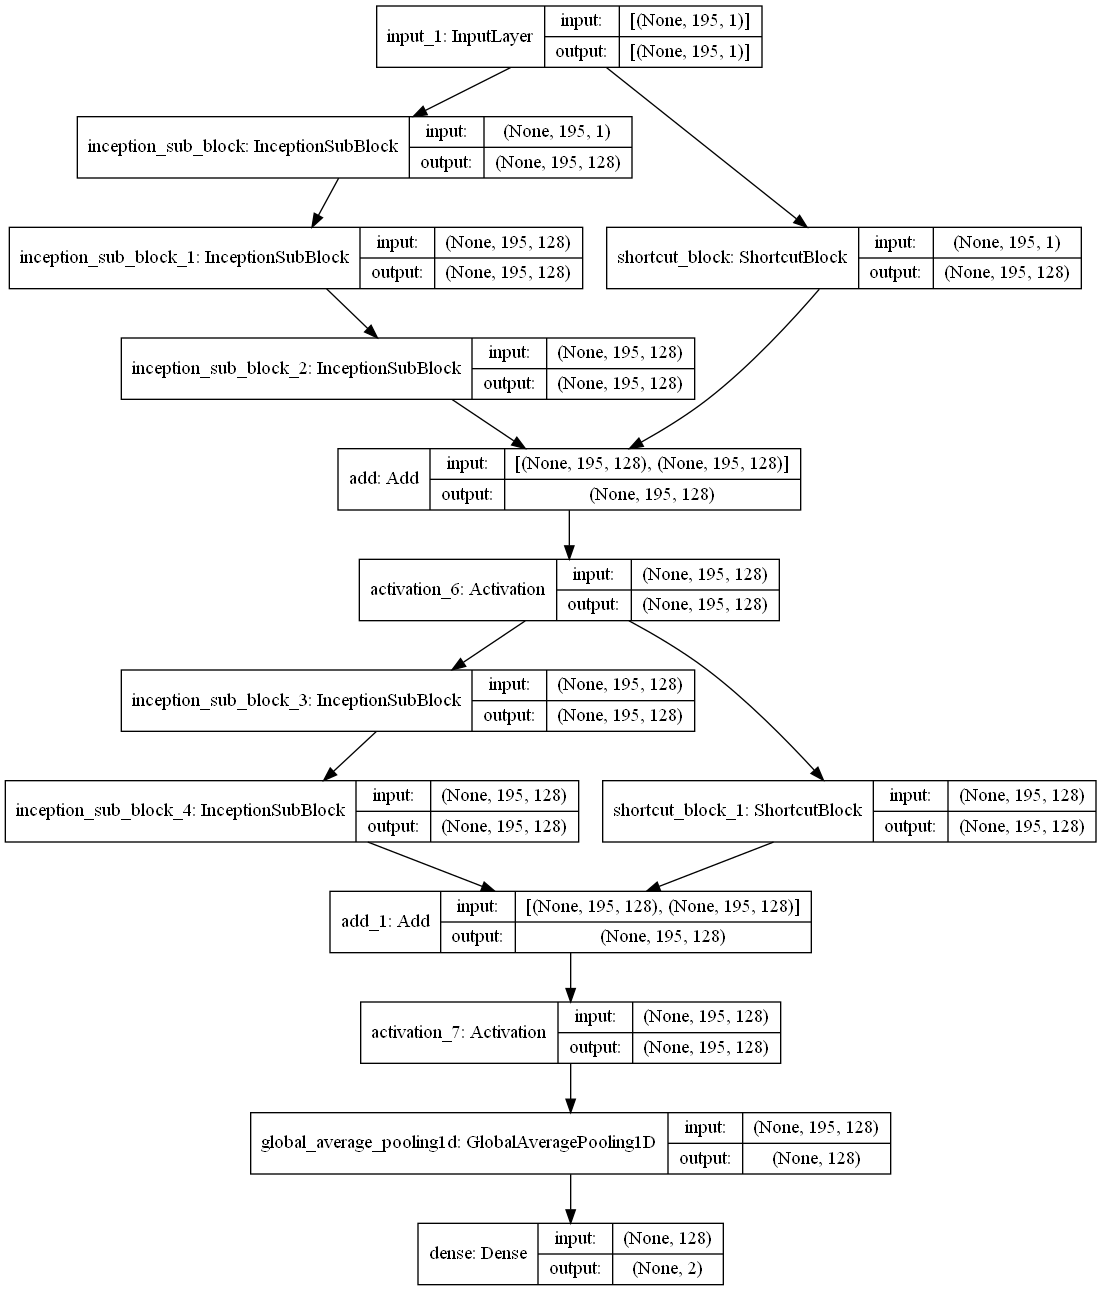

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(clf.model, show_shapes=True, show_layer_names=True)

# Define the Keras TensorBoard callback

In [8]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Fit model
Fit model on training and validation set

In [9]:
clf.model.fit(x=train.X,
              y=train.y,
              batch_size=60,
              epochs=200,
              verbose=1,
              validation_data=(valid.X, valid.y),
              callbacks=[tensorboard_callback])

C:\Users\holge\cernbox\mlframework\venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/5
1037/1037 [==============================] - 68s 51ms/step - loss: 0.5312 - tp: 12194.0000 - fp: 4388.0000 - tn: 12194.0000 - fn: 4388.0000 - accuracy: 0.7354 - precision: 0.7354 - recall: 0.7354 - auc: 0.8125 - prc: 0.7947 - val_loss: 0.5515 - val_tp: 3481.0000 - val_fp: 1257.0000 - val_tn: 3481.0000 - val_fn: 1257.0000 - val_accuracy: 0.7347 - val_precision: 0.7347 - val_recall: 0.7347 - val_auc: 0.8063 - val_prc: 0.7857
Epoch 2/5
1037/1037 [==============================] - 61s 59ms/step - loss: 0.5108 - tp: 12335.0000 - fp: 4247.0000 - tn: 12335.0000 - fn: 4247.0000 - accuracy: 0.7439 - precision: 0.7439 - recall: 0.7439 - auc: 0.8239 - prc: 0.8050 - val_loss: 0.5536 - val_tp: 3434.0000 - val_fp: 1304.0000 - val_tn: 3434.0000 - val_fn: 1304.0000 - val_accuracy: 0.7248 - val_precision: 0.7248 - val_recall: 0.7248 - val_auc: 0.8080 - val_prc: 0.7885
Epoch 3/5
1037/1037 [==============================] - 53s 51ms/step - loss: 0.4936 - tp: 12561.0000 - fp: 4021.0000 - tn: 125

# Evaluate model
Evaluate model on test set

In [10]:
results = clf.model.evaluate(x=test.X, y=test.y, return_dict=True)

75/75 [==============================] - 9s 85ms/step - loss: 0.4615 - tp: 1797.0000 - fp: 572.0000 - tn: 1797.0000 - fn: 572.0000 - accuracy: 0.7585 - precision: 0.7585 - recall: 0.7585 - auc: 0.8592 - prc: 0.8576


# Start tensorboard
Start TensorBoard within the notebook using magics:

In [11]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 26584), started 1:17:00 ago. (Use '!kill 26584' to kill it.)